#** London House Prediciton Using Machine Learning **
--Suraj Rajakrishnan




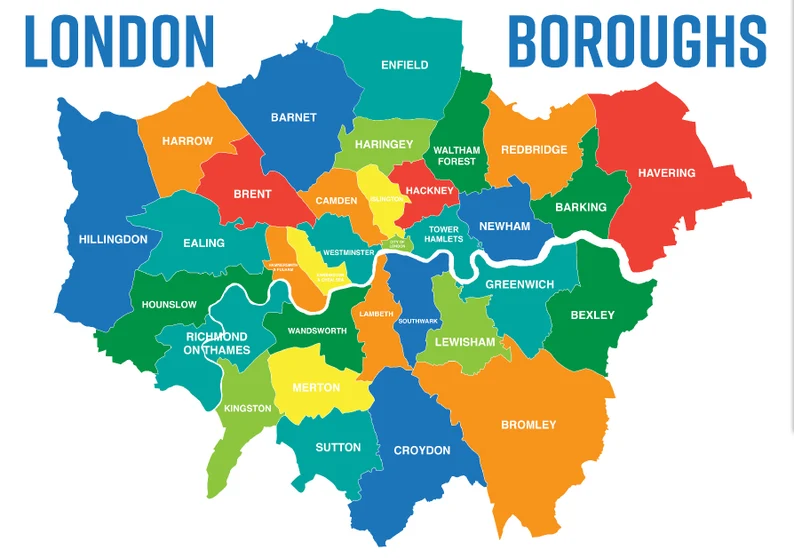

# What is Supervised Machine Learning ?
# Supervised machine learning is a type of machine learning where the model is trained on a set of labeled data, where the labels indicate the desired output for each input. The goal of the model is to learn a function that can map inputs to outputs, so that it can make accurate predictions on new, unseen data.

In [ ]:
# prompt: what are stages if supervised ML Models

# 1. Data Collection
# 2. Data Preprocessing
# 3. Feature Engineering
# 4. Model Selection
# 5. Model Training
# 6. Model Evaluation
# 7. Model Deployment


In [ ]:
# prompt: What are stages of Supervised ML Models

# 1. Data Collection and Preparation: Gather and clean the labeled data, handling missing values and outliers.
# 2. Feature Engineering: Select, transform, and create relevant features that improve model performance.
# 3. Model Selection: Choose an appropriate algorithm based on the problem type (classification or regression) and data characteristics.
# 4. Model Training: Train the chosen model on the prepared data, adjusting parameters to optimize performance.
# 5. Model Evaluation: Assess the model's performance on a held-out validation set using metrics like accuracy, precision, recall, or F1-score.
# 6. Hyperparameter Tuning: Fine-tune model parameters to further improve performance on the validation set.
# 7. Model Deployment and Monitoring: Deploy the trained model to make predictions on new data and continuously monitor its performance.


In [14]:
#Importing python Libraries
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
import plotly.graph_objects as go
import missingno as msno

import geopandas as gpd

#ML modules
from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [15]:
df_London= pd.read_csv('London.csv')

#Where can I get housing data ?
# This data is collected by HM Land registry, whereas similar ready made data set can be found in platform like Kaagle.  

In [16]:
df_London.head(5)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


#Lets me give you an example on how you write python code using generative AI


In [18]:
# prompt: Using dataframe df_London: what are different area in London with higest price.  Draw histogram

import altair as alt

# Group the data by location, house type, and calculate the maximum price for each group
grouped_df = df_London.groupby(['City/County'])['Price'].max().reset_index()

# Create a histogram
chart = alt.Chart(grouped_df).mark_bar().encode(
    x=alt.X('City/County', sort='-y'),  # Sort locations by maximum price in descending order
    y='Price',
    color='City/County',
    tooltip=['City/County', 'Price']
).properties(
    title='Highest House Prices by Location '
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

#Data Cleaning, Processing and EDA(Exploratory Data Analysis)

In [21]:
df_London.shape

(3480, 11)

In [22]:
## Data Processing
df_London.dtypes

,0
Unnamed: 0,int64
Property Name,object
Price,int64
House Type,object
Area in sq ft,int64
No. of Bedrooms,int64
No. of Bathrooms,int64
No. of Receptions,int64
Location,object
City/County,object


In [23]:
df_London.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3480.0,1.739500e+03,1.004734e+03,0.0,869.75,1739.5,2609.25,3479.0
Price,3480.0,1.864173e+06,2.267283e+06,180000.0,750000.00,1220000.0,2150000.00,39750000.0
Area in sq ft,3480.0,1.712974e+03,1.364259e+03,274.0,834.00,1310.0,2157.25,15405.0
No. of Bedrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Bathrooms,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0
No. of Receptions,3480.0,3.103736e+00,1.517698e+00,0.0,2.00,3.0,4.00,10.0


In [24]:
df_London.isnull().sum()

,0
Unnamed: 0,0
Property Name,0
Price,0
House Type,0
Area in sq ft,0
No. of Bedrooms,0
No. of Bathrooms,0
No. of Receptions,0
Location,962
City/County,0


In [25]:
#Oke lets remove this extra column
df_London=df_London.drop(['Unnamed: 0'],axis=1)

In [26]:
#lets count the Object Type
obj_col=df_London.dtypes =='object'
int_col=df_London.dtypes =='int64'
print("Categorical Variables:",len(list(obj_col[obj_col].index)))
print("Numerical Variables:",len(list(int_col[int_col].index)))

Categorical Variables: 5
Numerical Variables: 5


In [27]:
# Adding New variables
df_London['New Price']=df_London['Price']/1000
df_London['Price per sq ft']=df_London['Area in sq ft']/df_London['New Price']

In [41]:
df_London.head(5)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,New Price,Price per sq ft
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,1675.0,1.621493
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,650.0,1.252308
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,735.0,1.035374
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,1765.0,1.125212
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,675.0,1.037037


In [ ]:
##Heatmap using SNS lib

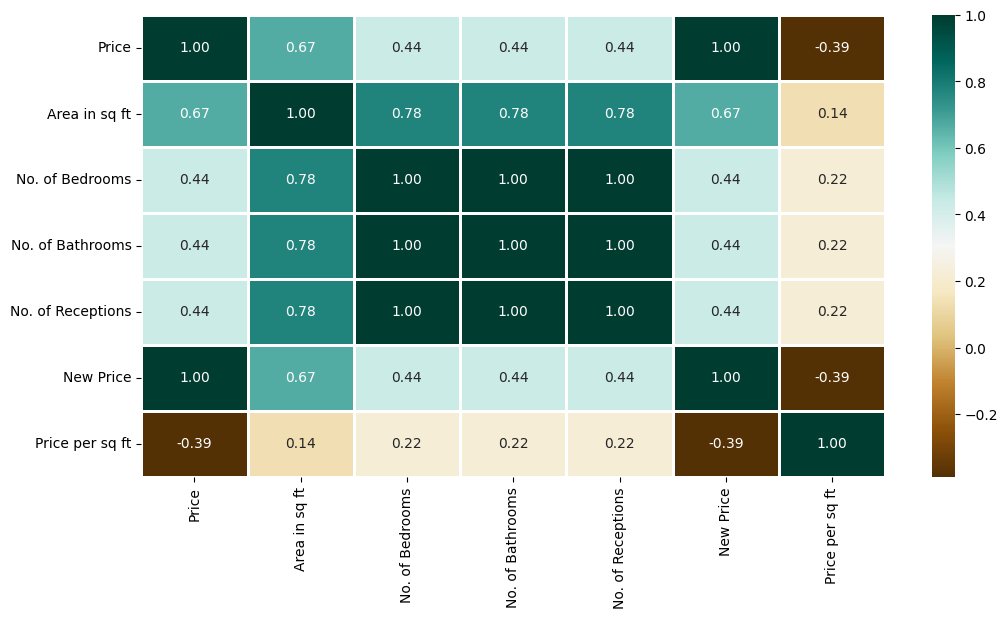

In [32]:
numerical_df = df_London.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_df.corr(),
           cmap='BrBG',fmt='.2f',
            linewidth=2,
           annot= True)
plt.show()

<ipython-input-33-914e6b47ccf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_London['New Price']);


Skewness: % 5.77264550423514
Kurtosis:%  55.76316936927732


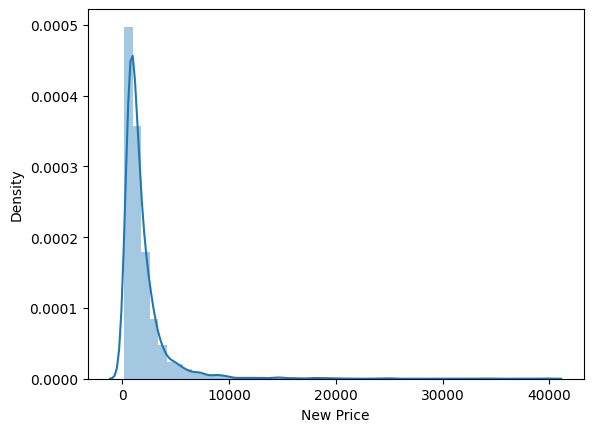

In [33]:
#plot histogram
sns.distplot(df_London['New Price']);
print('Skewness: %',df_London['New Price'].skew())
print('Kurtosis:% ',df_London['New Price'].kurt())

##Lets talk about is Skewness and Kurtosis...

## Skewness and Kutosis are two ways to measure the shape of a distribution,skewness is a measure of asymmeter. Ideally the score should be 0. Kurtosis is a measure is a measure to find id the distribution is heavy tailed or high tailed . IF the score isgreateter than 3 then it has many outliers

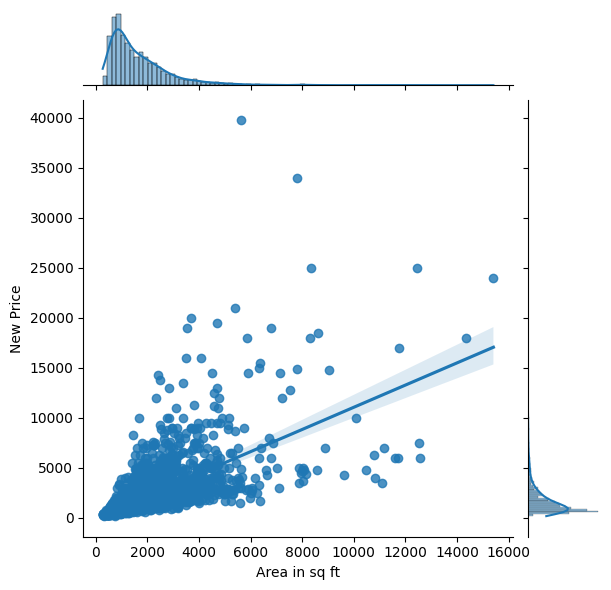

In [35]:
#Area vs Sales New price
sns.jointplot(x=df_London['Area in sq ft'],y=df_London['New Price'],kind='reg')

It make sense that people pay high for more living area.

In [36]:
# prompt: Give me count of new price range  make a group of between 10000

import pandas as pd
# Assuming 'New Price' is in thousands
price_bins = pd.cut(df_London['New Price'], bins=range(0, int(df_London['New Price'].max()) + 10000, 10000))
price_counts = price_bins.value_counts().sort_index()
print(price_counts)


New Price
(0, 10000]        3442
(10000, 20000]      32
(20000, 30000]       4
(30000, 40000]       2
Name: count, dtype: int64


In [37]:
# prompt: Give me count of new price range  make a group of between 10000

import pandas as pd
# Assuming 'New Price' is in thousands
price_bins = pd.cut(df_London['New Price'], bins=range(0, int(df_London['New Price'].max()) + 10000, 10000))
price_counts = price_bins.value_counts().sort_index()
print(price_counts)


New Price
(0, 10000]        3442
(10000, 20000]      32
(20000, 30000]       4
(30000, 40000]       2
Name: count, dtype: int64


In [42]:
# prompt: Give me count of area in sq ft   make a group of between 1000

import pandas as pd
area_bins = pd.cut(df_London['Area in sq ft'], bins=range(0, int(df_London['Area in sq ft'].max()) + 1000, 1000))
area_counts = area_bins.value_counts().sort_index()
print(area_counts)


Area in sq ft
(0, 1000]         1254
(1000, 2000]      1229
(2000, 3000]       594
(3000, 4000]       215
(4000, 5000]        95
(5000, 6000]        41
(6000, 7000]        16
(7000, 8000]        11
(8000, 9000]         9
(9000, 10000]        2
(10000, 11000]       4
(11000, 12000]       5
(12000, 13000]       3
(13000, 14000]       0
(14000, 15000]       1
(15000, 16000]       1
Name: count, dtype: int64


In [ ]:
# **How to handle outliers?**

# Once outliers are detected, there are several ways to handle them:

# - **Remove outliers:** If outliers are due to errors or are not representative of the population, they can be removed from the dataset.
# - **Replace outliers:** Outliers can be replaced with more reasonable values, such as the mean or median of the remaining data.
# - **Transform the data:** Applying transformations like log or square root can reduce the impact of outliers.
# - **Use robust methods:** Statistical methods or machine learning algorithms that are less sensitive to outliers can be used.

# The best approach for handling outliers depends on the specific dataset and the goals of the analysis.


In [43]:
## Removing outliers
new_df_London=df_London.drop(df_London[(df_London['New Price']> 10000) |

                                       (df_London['Area in sq ft'] >8000)].index).reset_index(drop=True)

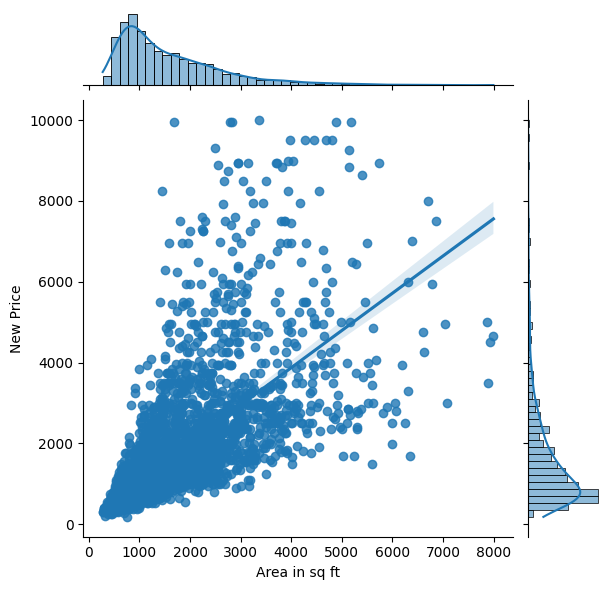

In [44]:
sns.jointplot(x=new_df_London['Area in sq ft'],y=new_df_London['New Price'],kind='reg')

In [45]:
#comparing new vs old Skewness after
print('Skewness: %',new_df_London['New Price'].skew())
print('Kurtosis:% ',new_df_London['New Price'].kurt())

Skewness: % 2.468641080302215
Kurtosis:%  7.5723364519844445


In [46]:
print('New',new_df_London.shape)
print('Old',df_London.shape)

New (3425, 12)
Old (3480, 12)


<ipython-input-47-ac7c2d003edb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='House Type', y='Price', palette='viridis')


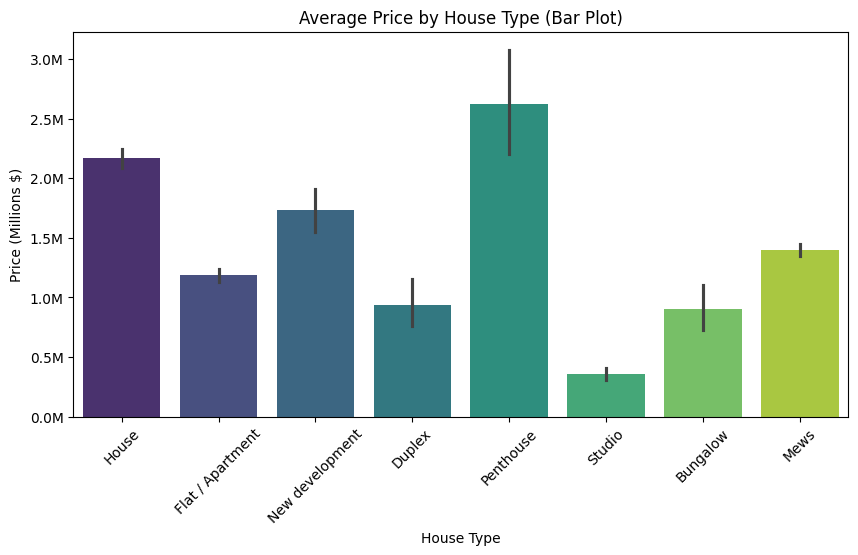

<ipython-input-47-ac7c2d003edb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='House Type', y='Price', palette='viridis')


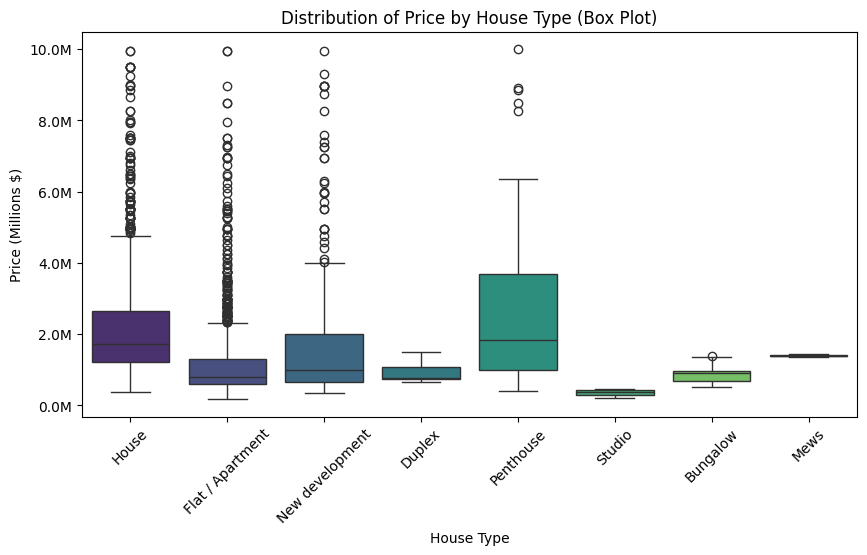

In [47]:
# Convert Price to millions
new_df = new_df_London.copy()  # Create a copy of the original DataFrame
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Plotting using bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Average Price by House Type (Bar Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

# Plotting using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x='House Type', y='Price', palette='viridis')
plt.title('Distribution of Price by House Type (Box Plot)')
plt.xlabel('House Type')
plt.ylabel('Price (Millions $)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Format y-axis labels to display in millions
plt.show()

<ipython-input-48-df1f6c62d456>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='No. of Bedrooms', y='Price', palette='viridis', ax=ax)


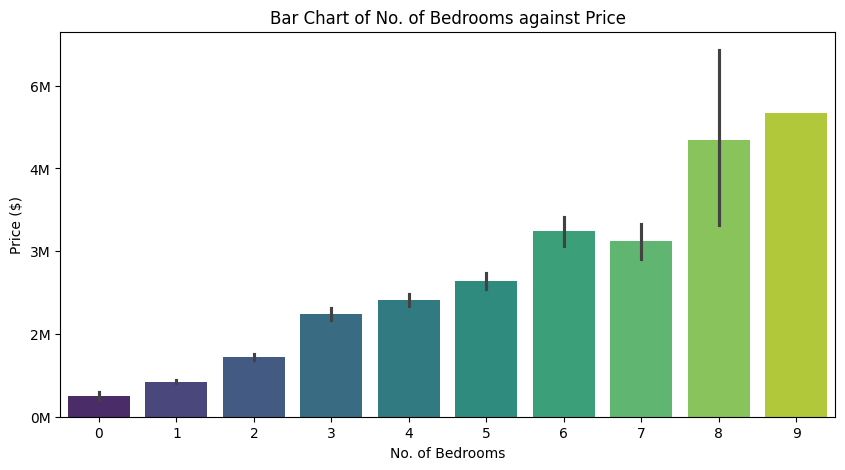

<ipython-input-48-df1f6c62d456>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='No. of Bathrooms', y='Price', palette='viridis', ax=ax)


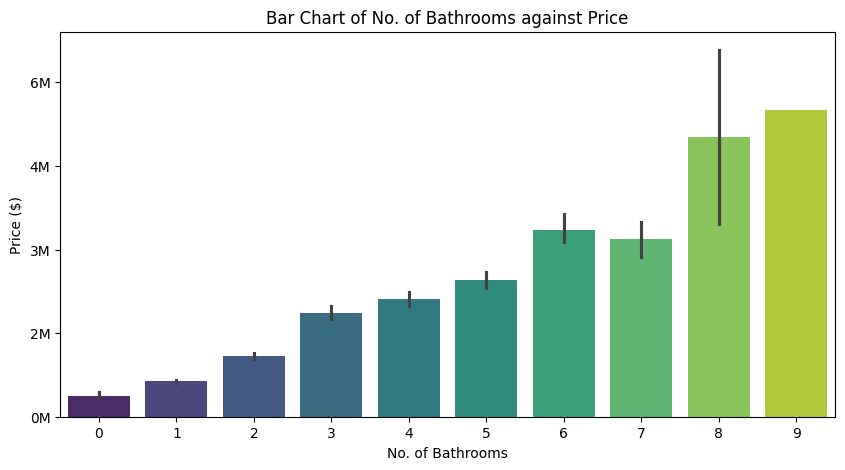

In [48]:
# Plot bar chart of No. of Bedrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=new_df, x='No. of Bedrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bedrooms against Price')
ax.set_xlabel('No. of Bedrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
formatter = FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000))  # Format y-axis labels to display in millions
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

# Plot bar chart of No. of Bathrooms against Price
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=new_df, x='No. of Bathrooms', y='Price', palette='viridis', ax=ax)
ax.set_title('Bar Chart of No. of Bathrooms against Price')
ax.set_xlabel('No. of Bathrooms')
ax.set_ylabel('Price ($)')
ax.grid(False)  # Remove grid lines
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of ticks
plt.show()

In [49]:
#Priting counts per Bedroom bathroom
print(new_df['No. of Bathrooms'].value_counts())
print(new_df['No. of Bedrooms'].value_counts())

No. of Bathrooms
2    1076
3     701
4     571
5     440
1     414
6     162
7      40
0      10
8      10
9       1
Name: count, dtype: int64
No. of Bedrooms
2    1076
3     701
4     571
5     440
1     414
6     162
7      40
0      10
8      10
9       1
Name: count, dtype: int64


In [50]:
new_df_London=new_df.drop(new_df[(new_df['No. of Bathrooms']> 8) |

                                       (new_df['No. of Bedrooms'] >8)].index).reset_index(drop=True)

In [51]:
print('Skewness: %',new_df_London['New Price'].skew())
print('Kurtosis:% ',new_df_London['New Price'].kurt())

Skewness: % 2.472734343212877
Kurtosis:%  7.605059611363396


In [52]:
new_df_London.shape

(3424, 12)

In [53]:
new_df_London.head(5)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,New Price,Price per sq ft
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,1675.0,1.621493
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,650.0,1.252308
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,735.0,1.035374
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,1765.0,1.125212
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,675.0,1.037037


##Geo Coding Postcode

In [54]:
import geopy
from geopy.geocoders import Nominatim

In [55]:
geo_df = new_df_London[['Price', 'Postal Code']].copy()
geo_df.head(5)

,Price,Postal Code
0,1675000,SW19 8NY
1,650000,EC1V 3PA
2,735000,SW15 1QL
3,1765000,SW15 1LP
4,675000,SW15 1PL


In [ ]:
#note High run time
import warnings
warnings.filterwarnings('ignore')

# Define geolocator
geolocator = Nominatim(user_agent="my_geocoder")

def my_geocoder(row):
    try:
        location = geolocator.geocode(row)
        if location:
            return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
                print(f"Geocoding failed for {row}. Location not found.")
                return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
    except Exception as e:
        print(f"Error geocoding {row}: {e}")
        return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})

# Apply my_geocoder function to 'Postal Code' column
geo_df[['Latitude', 'Longitude']] = geo_df['Postal Code'].apply(lambda x: my_geocoder(x))

# Drop rows where Latitude or Longitude is NaN
geo_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create GeoDataFrame
geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Longitude, geo_df.Latitude))
geo_df.crs = {'init': 'epsg:4326'}

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(geo_df["Latitude"])) / len(geo_df)) * 100))

geo_df.head()

In [57]:
#output of the above code segment is saved in the csv
geo_df=pd.read_csv("Geo_encoded_london_data.csv")
geo_df=geo_df.drop(['Unnamed: 0','Price'],axis=1)

In [58]:
geo_df.head(5)

,Postal Code,Latitude,Longitude,geometry
0,SW19 8NY,51.42478,-0.18949,POINT (-0.18949 51.42478)
1,EC1V 3PA,51.52640,-0.09785,POINT (-0.09785 51.5264)
2,SW15 1QL,51.46507,-0.22364,POINT (-0.22364 51.46507)
3,SW15 1LP,51.46910,-0.22255,POINT (-0.22255 51.4691)
4,SW15 1PL,51.46342,-0.22228,POINT (-0.22228 51.46342)


In [59]:
house_data =  pd.merge(new_df_London, geo_df, on='Postal Code', how='left')

house_data=house_data.drop(['Property Name','Location','City/County','Postal Code','geometry','Price','Price per sq ft'],axis=1)


In [60]:
house_data.head(5)

,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,New Price,Latitude,Longitude
0,House,2716,5,5,5,1675.0,51.42478,-0.18949
1,Flat / Apartment,814,2,2,2,650.0,51.52640,-0.09785
2,Flat / Apartment,814,2,2,2,650.0,51.52640,-0.09785
3,Flat / Apartment,814,2,2,2,650.0,51.52640,-0.09785
4,Flat / Apartment,814,2,2,2,650.0,51.52640,-0.09785


##Onehot Encoding for categorical data

In [ ]:
#We will use Onehot encoding to encode categorical data

In [ ]:


# One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can understand.


# Benefits of One-Hot Encoding:

# - Handles Categorical Data: Allows machine learning algorithms to work with categorical features.
# - Avoids Ordinality: Prevents the algorithm from misinterpreting categorical values as having an inherent order.
# - Improves Model Performance: Can lead to better predictive accuracy.



In [61]:
## One hot encoding for label categorical data
from sklearn.preprocessing import OneHotEncoder

s = (house_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['House Type']
No. of. categorical features:  1


In [72]:

OH_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(house_data[object_cols]))
OH_cols.index = house_data.index
# SHow how to check error
#OH_cols.columns = OH_encoder.get_feature_names()
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = house_data.drop(object_cols, axis=1)
df_final = pd.concat([house_data, OH_cols], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
df_final=df_final.drop(['House Type'],axis=1)

In [78]:
df_final=df_final.dropna()
df_final.shape

(5438, 15)

#*Lets* create a ML Model using Random Forest algorithm

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['New Price'], axis=1)
Y = df_final['New Price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

MAE=mean_absolute_percentage_error(Y_valid, Y_pred)



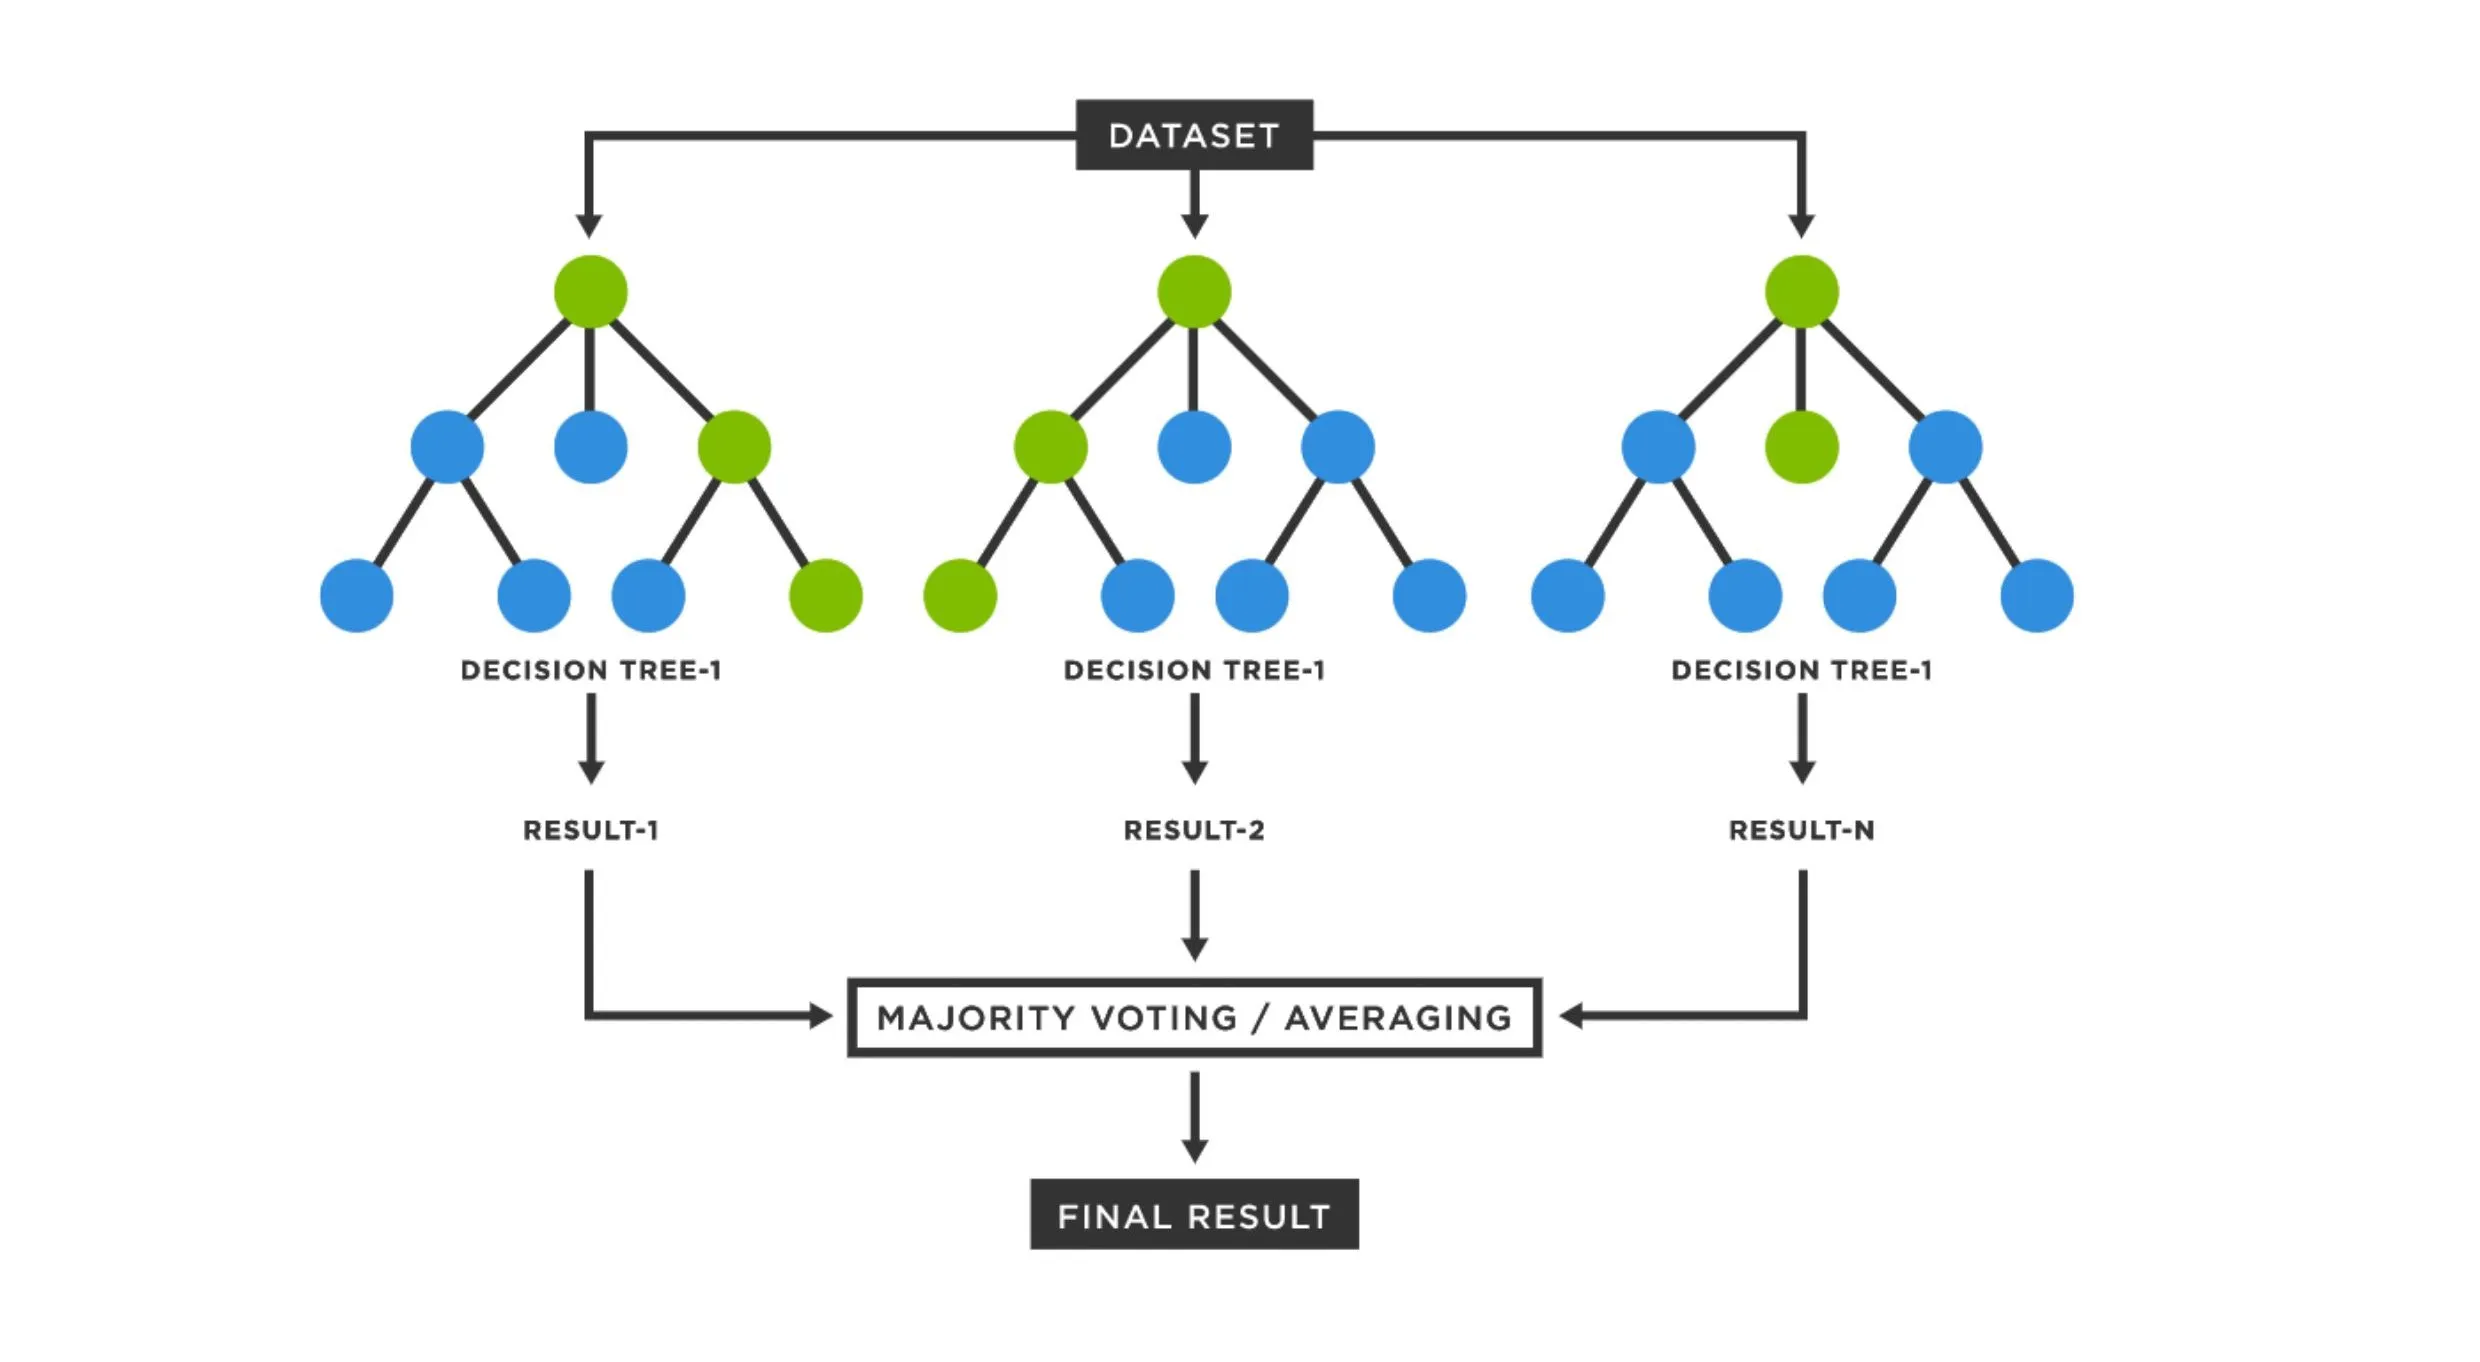

Looking at it step-by-step, this is what a random forest model does:
1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

In [82]:
print('Absolute Error',MAE)

Absolute Error 0.10370620478743928


In [83]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_valid, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_valid, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, Y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_valid, Y_pred))

MAE: 163.40143149484024
MSE: 113421.70399425887
RMSE: 336.7813890259657
VarScore: 0.9093237371342092


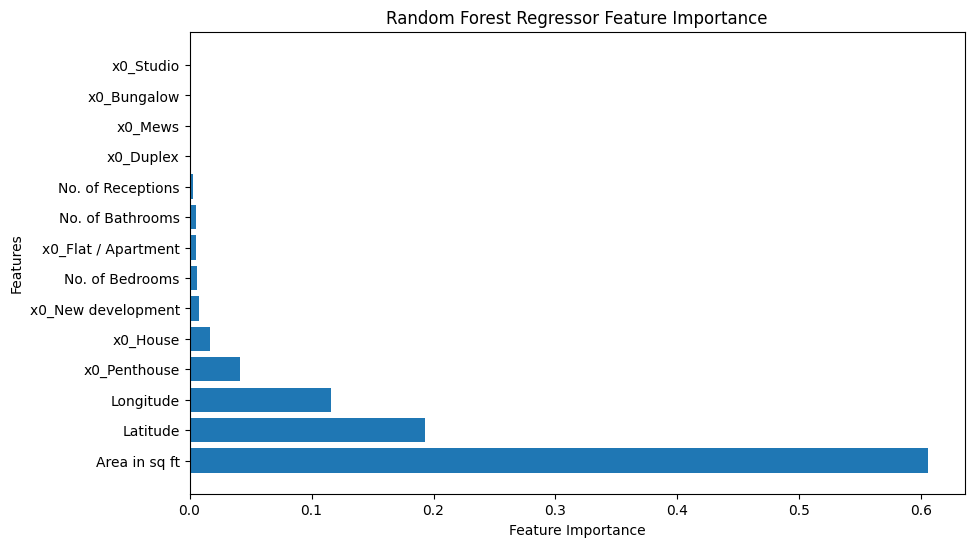

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define the feature names
features = ['Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms',
            'No. of Receptions', 'Latitude', 'Longitude',
            'x0_Bungalow',
'x0_Duplex',
'x0_Flat / Apartment',
'x0_House',
'x0_Mews',
'x0_New development',
'x0_Penthouse'  ,
'x0_Studio'
           ]

# Get feature importances from the trained model
importances = model_RFR.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Rearrange feature names based on sorted feature importances
sorted_features = [features[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_indices], align='center')
plt.yticks(range(len(features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

In [86]:
#Now lets print accuracy score
model_RFR.score(X_valid, Y_valid)

0.9092271213078168

In [95]:
X_valid

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Latitude,Longitude,House Type_Bungalow,House Type_Duplex,House Type_Flat / Apartment,House Type_House,House Type_Mews,House Type_New development,House Type_Penthouse,House Type_Studio
1355,2205,4,4,4,51.465480,-0.223700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4853,1083,3,3,3,51.486628,-0.197332,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2263,2368,5,5,5,51.462138,-0.215583,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4603,571,1,1,1,51.525880,-0.097560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5464,1026,3,3,3,51.478207,-0.146376,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,1008,2,2,2,51.467180,-0.221830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2550,2766,6,6,6,51.513650,-0.283950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
613,758,2,2,2,51.552710,-0.125100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1622,2432,4,4,4,51.532680,-0.176910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
## I want to know expected price Fulham High St, London SW6 3LF
## New Deveoplement Preferably 2 BHK with 2 bathrooms

test_data = [{'Area in sq ft': 550,
              'No. of Bedrooms': 1,
              'No. of Bathrooms': 1,
              'No. of Receptions':1,
              'Latitude':51.469397,
              'Longitude':-0.210496,
              'House Type_Bungalow':0.0,
               'House Type_Duplex':0.0,
                'House Type_Flat / Apartment':0.0,
                'House Type_House':0.0,
                'House Type_Mews':0.0,
                'House Type_New development':1.0,
                'House Type_Penthouse':0.0  ,
                'House Type_Studio':0.0


             }
        ]

# Creates DataFrame.
test_data = pd.DataFrame(test_data)

In [97]:
Output_price=model_RFR.predict(test_data)

In [123]:
print('Predicted House price for above search is £{:,.2f}'.format(Output_price[0]*1000))

Predicted House price for above search is £644,172.16
